In [1]:
import re
import os
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# parameters
FILTER_STEM = True
TRAIN_PORTION = 0.8
RANDOM_STATE = 7

dataset_path = os.path.join("..","input" ,os.listdir("../input")[0])
df = pd.read_csv(dataset_path, encoding="ISO-8859-1", names=["target", "ids", "date", "flag", "user", "text"])

In [2]:
%%time
decode_map = {0: -1, 2: 0, 4: 1}
df.target = df.target.apply(lambda x: decode_map[x])

CPU times: user 572 ms, sys: 52 ms, total: 624 ms
Wall time: 623 ms


Text(0.5, 1.0, 'Dataset labels distribuition')

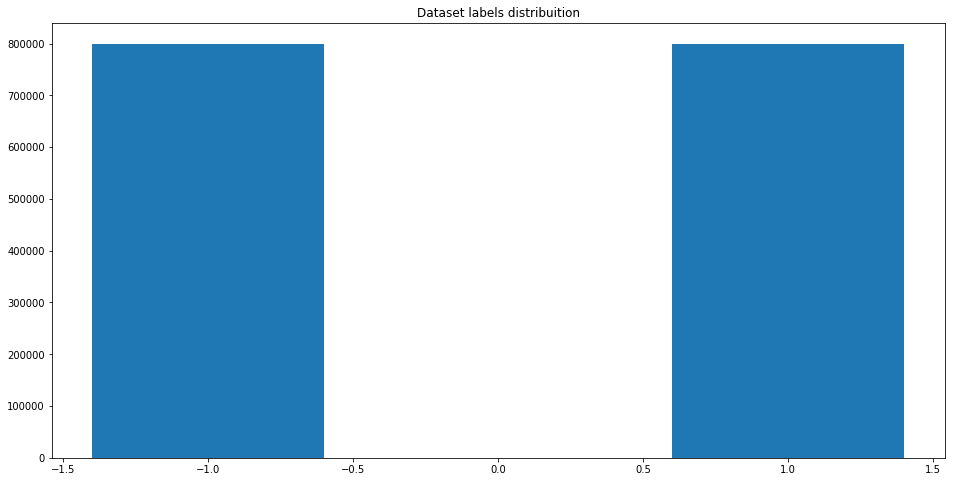

In [3]:
target_counter = Counter(df.target)

plt.figure(figsize=(16,8))
plt.bar(target_counter.keys(), target_counter.values())
plt.title("Dataset labels distribuition")

CPU times: user 1.1 s, sys: 64 ms, total: 1.17 s
Wall time: 1.17 s


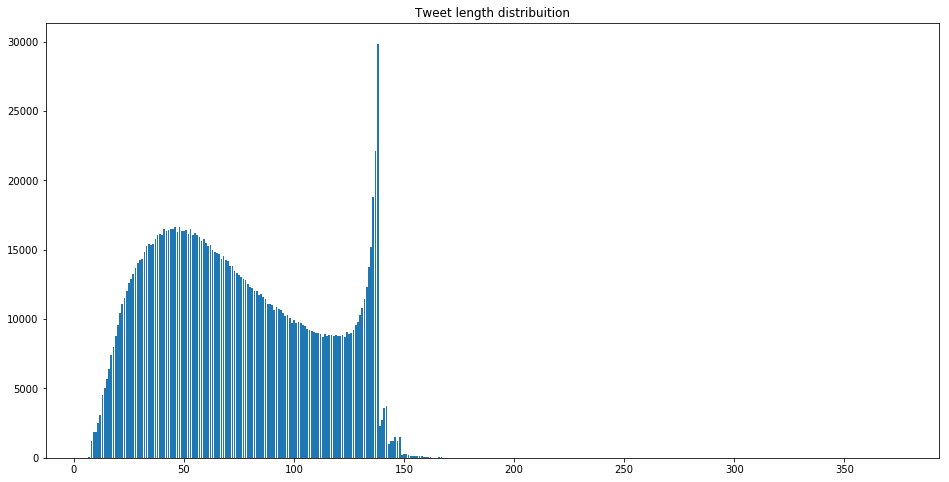

In [4]:
%%time
df['l'] = df.text.apply(lambda text: len(text))
length_counter = Counter(df.l)

plt.figure(figsize=(16,8))
plt.bar(length_counter.keys(), length_counter.values())
plt.title("Tweet length distribuition")

In [5]:
%%time
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
def filter_stopwords(text):
    text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", ' ', str(text).lower()).strip()
    return " ".join([token for token in text.split() if token not in stop_words])
df.text = df.text.apply(filter_stopwords)

CPU times: user 57.2 s, sys: 488 ms, total: 57.7 s
Wall time: 57.7 s


In [6]:
%%time
vectorizer = TfidfVectorizer()
word_frequency = vectorizer.fit_transform(df.text)

CPU times: user 21.9 s, sys: 1.15 s, total: 23.1 s
Wall time: 23.1 s


If we do not remove morphological affixes from words, we get 335479 different words.

In [7]:
len(vectorizer.get_feature_names())

335479

In [8]:
%%time
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
def filter_stopwords(text):
    text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", ' ', str(text).lower()).strip()
    return " ".join([stemmer.stem(token) for token in text.split() if token not in stop_words])
df.text = df.text.apply(filter_stopwords)

CPU times: user 3min 56s, sys: 324 ms, total: 3min 56s
Wall time: 3min 56s


In [9]:
%%time
vectorizer = TfidfVectorizer()
word_frequency = vectorizer.fit_transform(df.text)

CPU times: user 20.8 s, sys: 1.02 s, total: 21.8 s
Wall time: 21.8 s


If we do not remove morphological affixes from words, we get 288396 different words, so the stemming reduces the number of features to 85%.

In [10]:
len(vectorizer.get_feature_names())

288396

CPU times: user 1.63 s, sys: 56 ms, total: 1.69 s
Wall time: 1.69 s


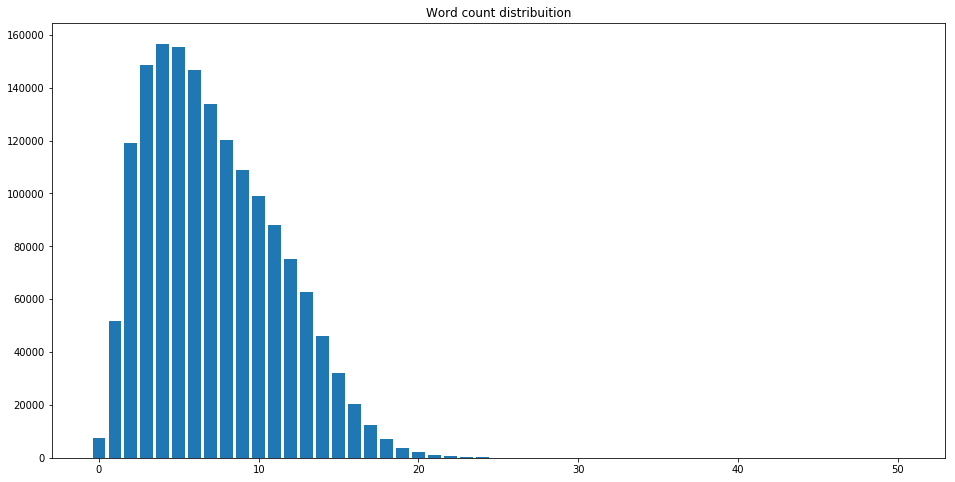

In [11]:
%%time
df['word_count'] = df.text.apply(lambda text: len(text.split()))
word_counter = Counter(df.word_count)

plt.figure(figsize=(16,8))
plt.bar(word_counter.keys(), word_counter.values())
plt.title("Word count distribuition")